In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/home/lagvna/WykazCzasopism/resources/wykaz.csv")

/home/lagvna/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,Wykaz czasopism naukowych,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,archeologia,filozofia,...,prawo kanoniczne,psychologia,astronomia,informatyka,matematyka,nauki biologiczne,nauki chemiczne,nauki fizyczne,nauki o Ziemi i środowisku,nauki teologiczne
2,Lp.,Tytuł 1,issn,e-issn,Tytuł 2,issn,e-issn,Punkty,101,102,...,510,511,601,602,603,604,605,606,607,701
3,1,2D Materials,2053-1583,2053-1583,2D Materials,NaN,2053-1583,140,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN
4,2,3 Biotech,2190-572X,2190-5738,3 Biotech,2190-572X,2190-5738,70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN


In [4]:
df.columns = df.iloc[2]

In [5]:
df.drop([0, 1, 2], inplace = True)

In [6]:
df = df[['Tytuł 1', 'Punkty']]

In [7]:
replacement_dict = {20: 1, 40: 2, 70: 3, 100: 4, 140: 5, 200: 6}

In [8]:
df['Punkty'].nunique()
df['Punkty'] = pd.to_numeric(df['Punkty'])
df['Punkty'].unique()

array([140,  70,  20, 100,  40, 200])

In [9]:
df = df.replace({"Punkty": replacement_dict})
df.head()

2,Tytuł 1,Punkty
3,2D Materials,5
4,3 Biotech,3
5,3C Empresa,1
6,3c Tecnologia,1
7,3C Tic,1


In [10]:
length = len(df)
midpoint = int(0.95 * length)

In [11]:
df = df.reindex(np.random.permutation(df.index))
train = df[:midpoint]
test = df[midpoint:]
train

2,Tytuł 1,Punkty
27458,Przestrzen Spoleczna,1
10567,Journal of Combinatorics,1
6247,EUROPEAN JOURNAL OF PHYSICS,2
1956,Asia-Pacific Journal of Teacher Education,3
8667,International Journal of Biomathematics,2
...,...,...
17496,Revista Critica de Ciencias Sociais,2
28413,Pomorania Antiqua,2
11744,Journal of Marketing Management,3
28453,Scripta & e-Scripta,1


In [12]:
test

2,Tytuł 1,Punkty
5704,Engaging Science Technology and Society,1
18220,Science Bulletin,5
25459,Pathophysiology,4
10484,JOURNAL OF CHURCH AND STATE,3
1533,Approaching Religion,2
...,...,...
12241,JOURNAL OF PERSONALITY DISORDERS,4
2345,Bibliotecas-Revista de la Escuela de Bibliotec...,1
22888,Idesia,1
15290,Nursing-Research and Reviews,1


In [13]:
from tensorflow.keras.utils import to_categorical

training_sentences = [i for i in train['Tytuł 1']]
testing_sentences = [i for i in test['Tytuł 1']]
training_labels = [int(i) for i in train['Punkty']]
testing_labels = [int(i) for i in test['Punkty']]

training_labels = training_labels
testing_labels = testing_labels


training_labels_final = to_categorical(training_labels)
testing_labels_final = to_categorical(testing_labels)

In [14]:
vocab_size = 10000
embedding_dim = 7
max_length = 20
trunc_type='post'
oov_tok = "<OOV>"

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [16]:
testing_labels_final[2]

#from tensorflow.keras.utils.np_utils import to_categorical

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, SpatialDropout1D, Embedding, GRU, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras import regularizers

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)


model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
#model.add(SpatialDropout1D(0.2))
#model.add(LSTM(32, dropout=0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, activation='relu'))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Bidirectional(LSTM(64, return_sequences = True)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7,activation='softmax'))

# model.add(Conv1D(128, 8, activation='relu', padding='same'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, 8, activation='relu', padding='same'))
# model.add(Conv1D(128, 8, activation='relu', padding='same'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, 8, activation='relu', padding='same'))
# model.add(Conv1D(128, 8, activation='relu', padding='same'))
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.build(max_length)
print(model.summary())


# conv2 = Conv1D(filters=128, kernel_size=5, activation='relu')(text_input)
# drop21 = Dropout(0.5)(conv2)
# conv22 = Conv1D(filters=64, kernel_size=5, activation='relu')(drop21)
# drop22 = Dropout(0.5)(conv22)

# lstm1 = Bidirectional(LSTM(128, return_sequences = True))(drop22)
# lstm2 = Bidirectional(LSTM(64, return_sequences = True))(lstm1)

# flat = Flatten()(lstm2)
# dense = Dense(128, activation='relu')(flat)
# out = Dense(32, activation='relu')(dense)

# outputs = Dense(y_train.shape[1], activation='softmax')(out)

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout = 0.4)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(21, activation='softmax')
# ])

# adam = tf.keras.optimizers.Adam(learning_rate=0.0001, name='Adam')

# model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 7)             70000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 128)           4608      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            41024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 64)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 12, 256)           197632    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 12, 128)          

In [20]:
num_epochs = 100
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=128, validation_data=(testing_padded, testing_labels_final))

Epoch 1/100
216/216 [==============================] - 17s 79ms/step - loss: 1.5278 - accuracy: 0.3663 - val_loss: 1.4759 - val_accuracy: 0.3946
Epoch 2/100
216/216 [==============================] - 16s 74ms/step - loss: 1.4206 - accuracy: 0.3962 - val_loss: 1.4542 - val_accuracy: 0.3809
Epoch 3/100
216/216 [==============================] - 17s 76ms/step - loss: 1.3526 - accuracy: 0.4173 - val_loss: 1.4640 - val_accuracy: 0.3795
Epoch 4/100
216/216 [==============================] - 18s 84ms/step - loss: 1.3004 - accuracy: 0.4344 - val_loss: 1.5181 - val_accuracy: 0.3884
Epoch 5/100
216/216 [==============================] - 17s 77ms/step - loss: 1.2555 - accuracy: 0.4543 - val_loss: 1.5147 - val_accuracy: 0.3629
Epoch 6/100
216/216 [==============================] - 18s 84ms/step - loss: 1.2212 - accuracy: 0.4688 - val_loss: 1.5553 - val_accuracy: 0.3437
Epoch 7/100
216/216 [==============================] - 19s 88ms/step - loss: 1.1885 - accuracy: 0.4854 - val_loss: 1.5916 - val_ac

216/216 [==============================] - 17s 79ms/step - loss: 0.7659 - accuracy: 0.7006 - val_loss: 2.6187 - val_accuracy: 0.3574
Epoch 58/100
216/216 [==============================] - 17s 77ms/step - loss: 0.7636 - accuracy: 0.7041 - val_loss: 2.4779 - val_accuracy: 0.3547
Epoch 59/100
216/216 [==============================] - 17s 80ms/step - loss: 0.7619 - accuracy: 0.7049 - val_loss: 2.7405 - val_accuracy: 0.3561
Epoch 60/100
216/216 [==============================] - 17s 81ms/step - loss: 0.7576 - accuracy: 0.7046 - val_loss: 2.5739 - val_accuracy: 0.3705
Epoch 61/100
216/216 [==============================] - 18s 82ms/step - loss: 0.7571 - accuracy: 0.7035 - val_loss: 2.5052 - val_accuracy: 0.3650
Epoch 62/100
216/216 [==============================] - 18s 81ms/step - loss: 0.7539 - accuracy: 0.7065 - val_loss: 2.6348 - val_accuracy: 0.3533
Epoch 63/100
216/216 [==============================] - 20s 92ms/step - loss: 0.7475 - accuracy: 0.7100 - val_loss: 2.7354 - val_accuracy

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

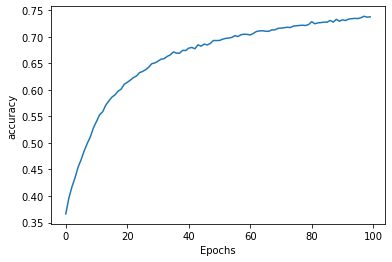

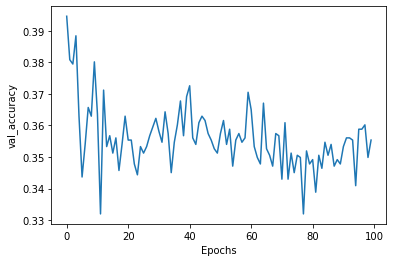

In [22]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'val_accuracy')

In [23]:
title = 'distributed computing'
token_list = tokenizer.texts_to_sequences([title])[0]
token_list = pad_sequences([token_list], maxlen=max_length-1, padding='post')
predicted = model.predict_classes(token_list, verbose=0)

print(predicted)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


ValueError: in user code:

    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/lagvna/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_3 is incompatible with the layer: expected axis -1 of input shape to have value 1536 but received input with shape [None, 1408]
